In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from google.colab import drive

# Pengaturan visualisasi (opsional)
sns.set_style("whitegrid")

In [2]:
# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Definisikan path ke file dataset
# GANTI [ISI_PATH_KE_FOLDER_DATASET] dengan path folder yang sebenarnya!
# Contoh: '/content/drive/MyDrive/DataScience/insurance.csv'
dataset_path = '/content/drive/MyDrive/JS Machine Learning/JS6 - Regresi/insurance.csv'

# 3. Muat dataset
try:
    df = pd.read_csv(dataset_path)
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di path: {dataset_path}")
    print("Pastikan Anda sudah me-mount Drive dan path dataset sudah benar.")

# Tampilkan 5 baris pertama data dan informasi data
if 'df' in locals():
    print("\n--- 5 Baris Pertama Data ---")
    print(df.head())
    print("\n--- Informasi Data (Data Types dan Missing Values) ---")
    df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil dimuat!

--- 5 Baris Pertama Data ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- Informasi Data (Data Types dan Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   objec

In [3]:
# 1. Identifikasi Variabel Bebas (Features) dan Variabel Target
# Variabel Target: 'charges' (Biaya Medis Personal)
# Variabel Bebas: 'age', 'sex', 'bmi', 'children', 'smoker', 'region'

# 2. Preprocessing Data (Menangani Variabel Kategorikal)

# Mengubah variabel biner 'sex' dan 'smoker' menjadi numerik (0 dan 1)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Menggunakan One-Hot Encoding untuk variabel 'region' (non-ordinal)
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Tampilkan hasil preprocessing
print("--- Hasil Preprocessing ---")
print(df.head())
print(f"\nJumlah kolom setelah One-Hot Encoding: {df.shape[1]}")

--- Hasil Preprocessing ---
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Jumlah kolom setelah One-Hot Encoding: 9


In [4]:
# 1. Memisahkan Fitur (X) dan Target (y)
X = df.drop('charges', axis=1) # Semua kolom kecuali 'charges'
y = df['charges']

# 2. Membagi Dataset (Data Latih dan Data Uji)
# Proporsi 80% train, 20% test, menggunakan random_state agar hasil konsisten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih (X_train): {X_train.shape}")
print(f"Ukuran Data Uji (X_test): {X_test.shape}")

# 3. Membuat dan Melatih Model Multiple Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print("\nModel Multiple Linear Regression berhasil dilatih!")

Ukuran Data Latih (X_train): (1070, 8)
Ukuran Data Uji (X_test): (268, 8)

Model Multiple Linear Regression berhasil dilatih!


In [5]:
# 1. Melakukan Prediksi pada Data Uji
y_pred = model_lr.predict(X_test)

# 2. Evaluasi Model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Hasil Evaluasi Model Multiple Linear Regression ---")
print(f"R-squared (Koefisien Determinasi): {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 3. Analisis Singkat Koefisien (Opsional)
print("\n--- Koefisien Model (Pengaruh Variabel Terhadap Biaya) ---")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_lr.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

print("\nInterpretasi:")
print(f"* R-squared = {r_squared:.4f} menunjukkan bahwa sekitar {r_squared*100:.2f}% variabilitas biaya (charges) dapat dijelaskan oleh fitur-fitur dalam model.")
print(f"* MAE = {mae:.2f} berarti rata-rata, prediksi model meleset sekitar \${mae:.2f} dari biaya aktual.")

--- Hasil Evaluasi Model Multiple Linear Regression ---
R-squared (Koefisien Determinasi): 0.7836
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28

--- Koefisien Model (Pengaruh Variabel Terhadap Biaya) ---
            Feature   Coefficient
4            smoker  23651.128856
3          children    425.278784
2               bmi    337.092552
0               age    256.975706
1               sex    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354

Interpretasi:
* R-squared = 0.7836 menunjukkan bahwa sekitar 78.36% variabilitas biaya (charges) dapat dijelaskan oleh fitur-fitur dalam model.
* MAE = 4181.19 berarti rata-rata, prediksi model meleset sekitar \$4181.19 dari biaya aktual.


<>:23: SyntaxWarning: invalid escape sequence '\$'
<>:23: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2021564139.py:23: SyntaxWarning: invalid escape sequence '\$'
  print(f"* MAE = {mae:.2f} berarti rata-rata, prediksi model meleset sekitar \${mae:.2f} dari biaya aktual.")


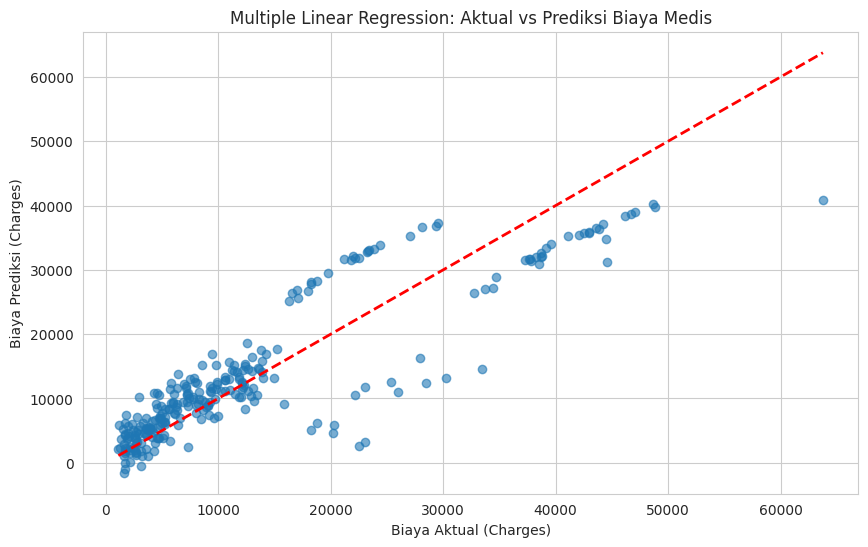

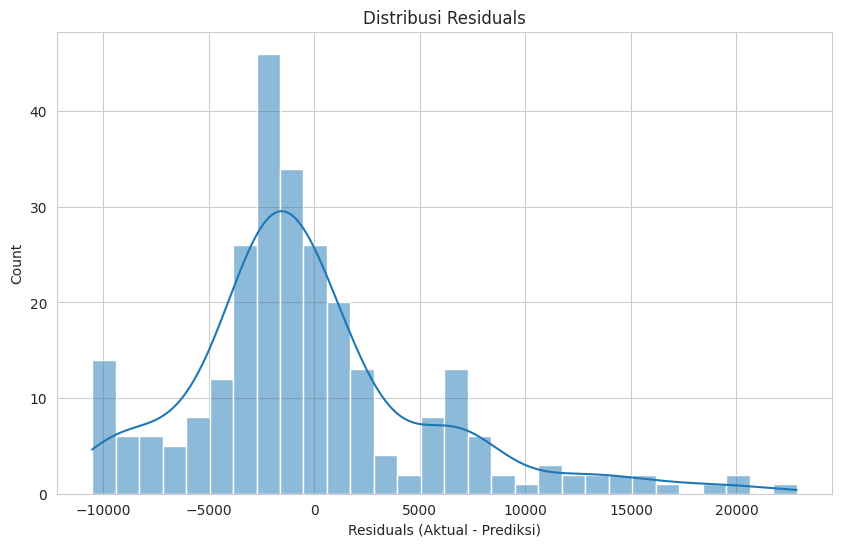

In [6]:
# Visualisasi Perbandingan Nilai Aktual vs Prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Garis y=x
plt.title('Multiple Linear Regression: Aktual vs Prediksi Biaya Medis')
plt.xlabel('Biaya Aktual (Charges)')
plt.ylabel('Biaya Prediksi (Charges)')
plt.show()

# Visualisasi Residuals (Selisih)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribusi Residuals')
plt.xlabel('Residuals (Aktual - Prediksi)')
plt.show()